<h1 style="color: #00BFFF;">00 |</h1>

In [1]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import os # file managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management
import datetime # to play with dates

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
# Specific functions

def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def get_house_soldtime(row): # Define the get_house_soldtime function
    today = datetime.datetime.today().year
    return today - row['year']

def get_house_lifetime(row): # Define the get_house_lifetime function
    today = datetime.datetime.today().year
    if row['yr_renovated'] != 0:
        return today - row['yr_renovated']
    else:
        return today - row['yr_built']

<h2 style="color: #008080;">Data Extraction</h2>

In [3]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "datac.csv")
datac = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column
datac = datac.reset_index()

<h1 style="color: #00BFFF;">02 | Data cleaning</h1>

<h2 style="color: #008080;">Saving information about Seattle houses</h2>

In [4]:
# It'll have some sense later for the conclusions :)
seattle = datac[["lat","long", "zipcode"]]
seattle.to_csv("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data/seattle.csv")

<h2 style="color: #008080;">Dealing with Duplicates</h2>

In [5]:
explore_data(datac)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
id,0,0
date,0,0
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0
condition,0,0


In [6]:
# Nothing to do here... moving on!

<h2 style="color: #008080;">Dealing with datetime formats</h2>

In [8]:
# Convert 'date' column to datetime format (it's an object after creating a new dataset)
datac['date'] = pd.to_datetime(datac['date'])

# Dates are complex. We will create 3 new columns for year, month and day.
datac['year'] = datac['date'].dt.year
datac['month'] = datac['date'].dt.month_name().str.slice(stop=3) #instead of giving them a number, we make them categoricals, and then we will encode them

<h2 style="color: #008080;">Feature Engineering</h2>

In [9]:
# Apply the function to create a new column 'house_soldtime' "JC rocks !" :) ~ isi
datac['house_soldtime'] = datac.apply(get_house_soldtime, axis=1)

# Print the updated DataFrame
datac.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month,house_soldtime
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,Oct,9
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,Dec,9
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,Feb,8
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,Dec,9
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,Feb,8


<h2 style="color: #008080;">Dropping unnecessary features</h2>

In [10]:
datac = datac.drop('id', axis=1) # Well, obvious or NaN?
datac = datac.drop(['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'year', 'date'], axis=1)

<h2 style="color: #008080;">Encoding Categoricals</h2>

<h2 style="color: #008080;">Dealing with Skewness</h2>

<h2 style="color: #008080;">Dealing with Outliers</h2>

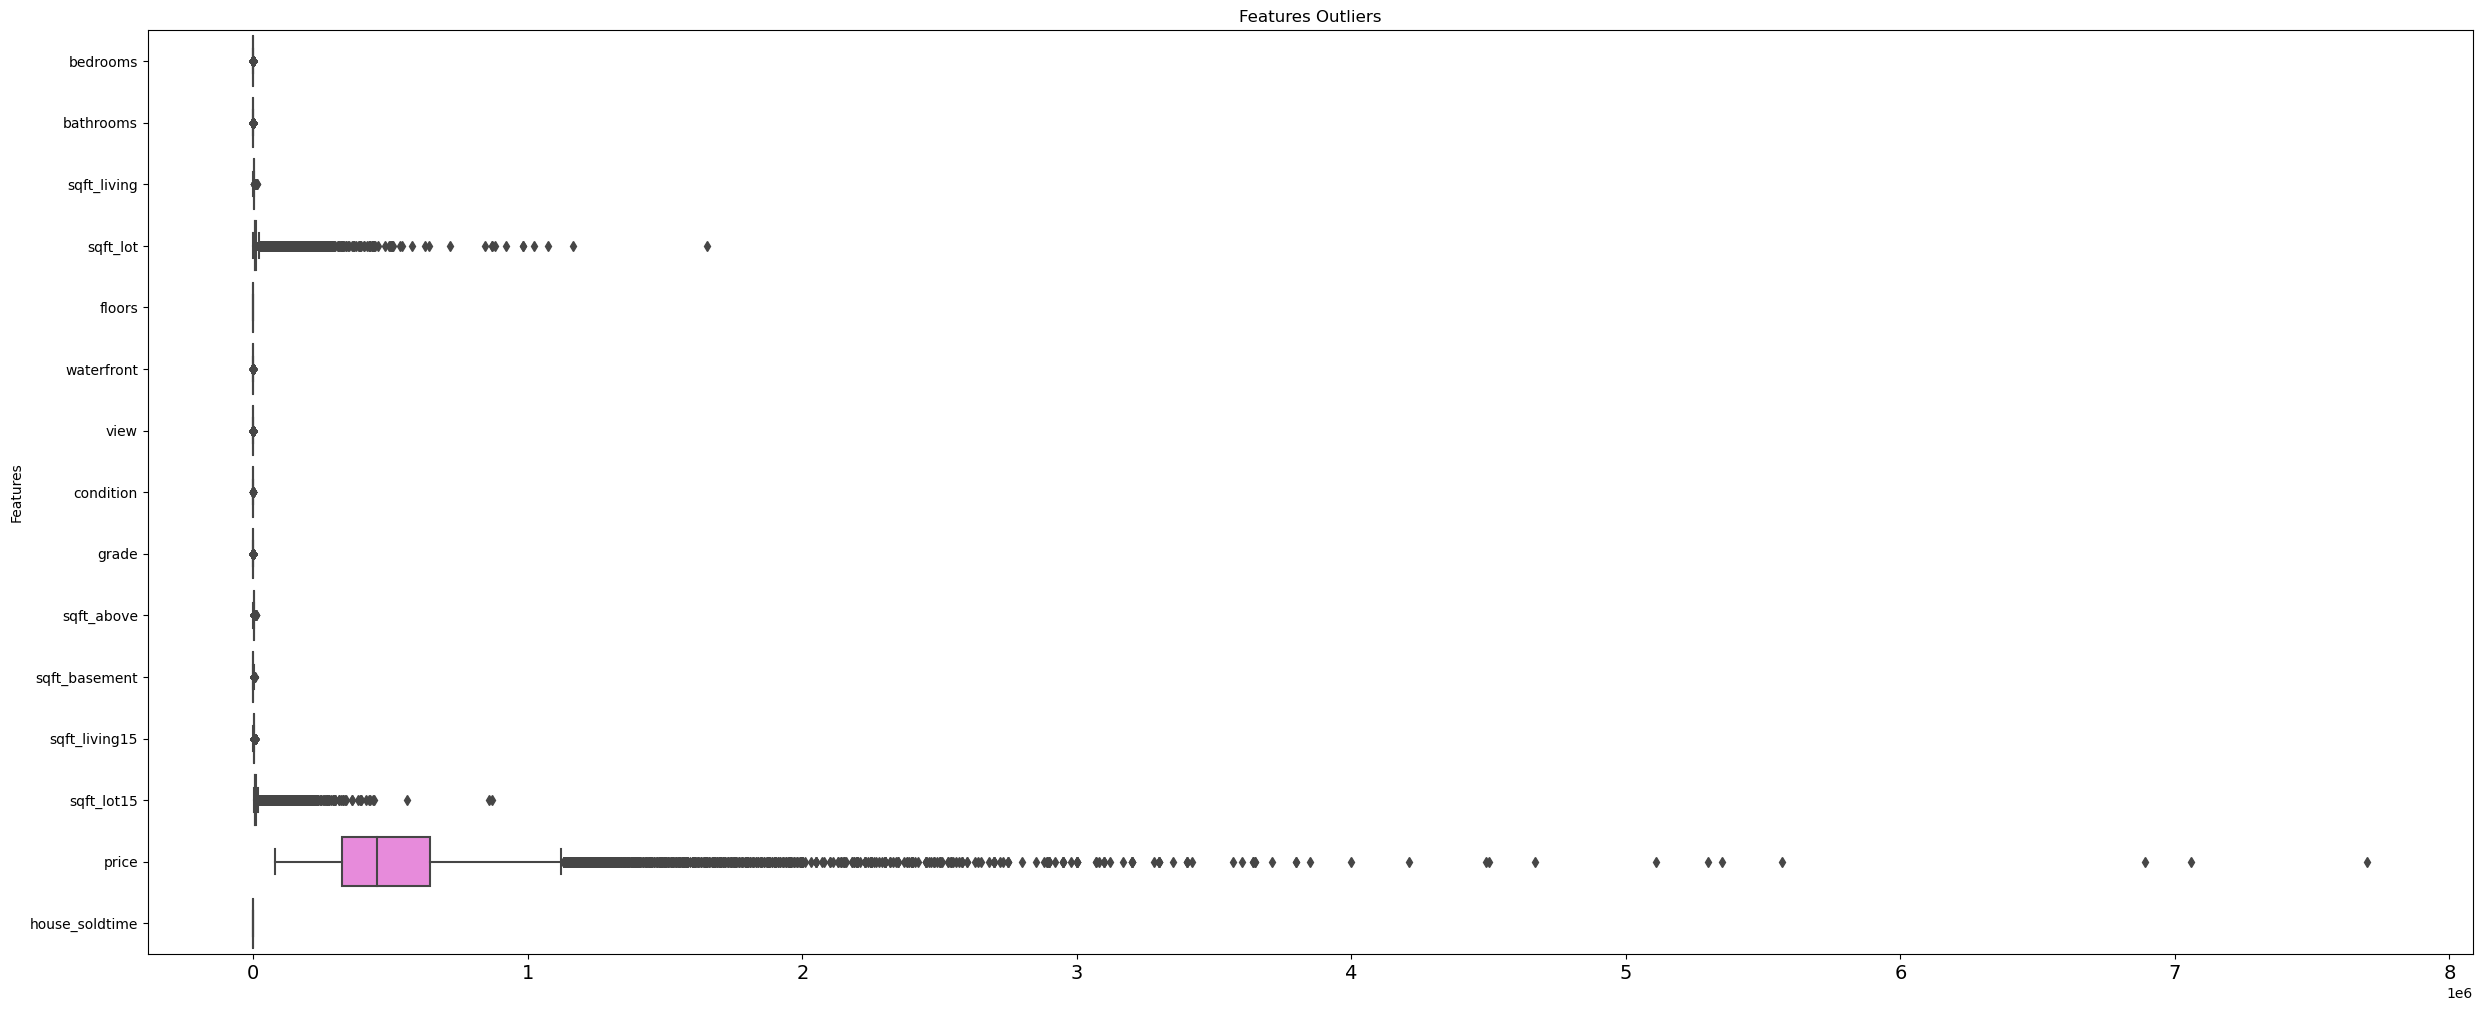

In [11]:
fig, ax = plt.subplots(figsize=(30, 12))
sns.boxplot(data=datac, orient="h", ax=ax, showfliers=True, whis=1.5)

# Set the x-axis label
ax.set_ylabel("Features")
# Set the title of the plot
ax.set_title("Features Outliers")
# Adjust the font size of the x-axis ticks
ax.tick_params(axis='x', labelsize=14)
# Show the plot
plt.show()

In [15]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14400 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        14400 non-null  int64  
 1   bathrooms       14400 non-null  float64
 2   sqft_living     14400 non-null  int64  
 3   sqft_lot        14400 non-null  int64  
 4   floors          14400 non-null  float64
 5   waterfront      14400 non-null  int64  
 6   view            14400 non-null  int64  
 7   condition       14400 non-null  int64  
 8   grade           14400 non-null  int64  
 9   sqft_above      14400 non-null  int64  
 10  sqft_basement   14400 non-null  int64  
 11  sqft_living15   14400 non-null  int64  
 12  sqft_lot15      14400 non-null  int64  
 13  price           14400 non-null  int64  
 14  month           14400 non-null  object 
 15  house_soldtime  14400 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 1.9+ MB


In [14]:
# Automatically removing outliers
for column in datac:
    Q1 = datac[column].quantile(0.25)
    Q3 = datac[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    datac = datac[(datac[column] >= lower_bound) & (datac[column] <= upper_bound)]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [8]:
# Moving on to EDA >
cleaned = datac.copy()
cleaned.to_csv("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data/cleaned.csv")